### Proyecto 4



#####  1. Importar Librerías Generales 

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#####  2. Importar Librerías  Tensorflow y  keras

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

##### 3. Cargar Imágenes para crear el DataSet

In [3]:
dirname = os.path.join(os.getcwd(), r'E:\IA\Proyecto_4 CNN\Imagenes')
imgpath = dirname + os.sep 
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            # print (b, end="\r")
            if prevRoot !=root:
                print(root, cant).
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  E:\IA\Proyecto_4 CNN\Imagenes\
E:\IA\Proyecto_4 CNN\Imagenes\asalto 1
E:\IA\Proyecto_4 CNN\Imagenes\incendio 6709
E:\IA\Proyecto_4 CNN\Imagenes\inundacion 9389
E:\IA\Proyecto_4 CNN\Imagenes\robo 5240
E:\IA\Proyecto_4 CNN\Imagenes\tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [6710, 9389, 5240, 8765, 8435]
suma Total de imagenes en subdirs: 38539



##### 4. Crear etiquetas   

In [4]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  38539


In [5]:
risk=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    risk.append(name[len(name)-1])
    indice=indice+1

0 asalto
1 incendio
2 inundacion
3 robo
4 tornado


In [6]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) 

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


##### 5. Dividimos el set en: entrenamiento y test.

In [7]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (30831, 28, 28, 3) (30831,)
Testing data shape :  (7708, 28, 28, 3) (7708,)


Text(0.5, 1.0, 'Ground Truth : 1')

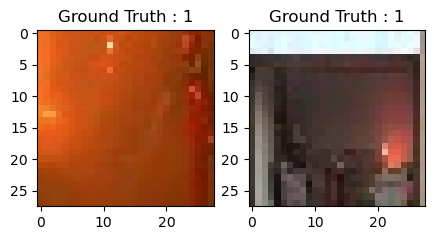

In [8]:
plt.figure(figsize=[5,5])

# Desplegar la primera imagen en el set de entrenamiento
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Desplegar la primera imagen en el set de prueba
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

##### 6.Procesamiento de imagenes

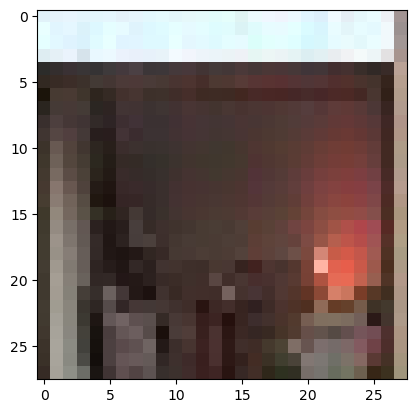

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

##### 7.Crear el One-hot Encoding para la CNN

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


##### 8. Creamos el Set de Entrenamiento y Validación

In [11]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [12]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(24664, 28, 28, 3) (6167, 28, 28, 3) (24664, 5) (6167, 5)


##### 9. Creamos el modelo de CNN

In [13]:
#Parámetros de la red
INIT_LR = 1e-3                                     # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20                                        # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64                                    # Cantidad de imágenes que se toman a la vez en memoria

In [14]:
risk_model = Sequential()
risk_model.add(Input(shape=(28, 28, 3)))  # Medida de las imagenes procesar 28x28
risk_model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', padding='same'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(MaxPooling2D((2, 2), padding='same'))
risk_model.add(Dropout(0.5))

risk_model.add(Flatten())
risk_model.add(Dense(32, activation='linear'))
risk_model.add(LeakyReLU(negative_slope=0.1))
risk_model.add(Dropout(0.5))
risk_model.add(Dense(nClasses, activation='softmax'))

In [15]:
risk_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                     │ (None, 28, 28, 32)         │            896 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ leaky_re_lu (LeakyReLU)             │ (None, 28, 28, 32)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ max_pooling2d (MaxPooling2D)        │ (None, 14, 14, 32)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                   │ (None, 14, 14, 32)         │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ flatten (Flatten)                   │ (None, 6272)               │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense (Dense)                       │ (None, 32)                 │        200,736 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ leaky_re_lu_1 (LeakyReLU)           │ (None, 32)                 │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout_1 (Dropout)                 │ (None, 32)                 │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_1 (Dense)                     │ (None, 5)                  │            165 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
risk_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR),
    metrics=['accuracy']
)

##### 10. Entrenamos el modelo: Aprende a clasificar imágenes

In [17]:
risk_train = risk_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.3076 - loss: 1.5583 - val_accuracy: 0.7407 - val_loss: 1.1631
Epoch 2/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5486 - loss: 1.2042 - val_accuracy: 0.7824 - val_loss: 0.8691
Epoch 3/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6285 - loss: 0.9933 - val_accuracy: 0.8346 - val_loss: 0.7215
Epoch 4/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6853 - loss: 0.8746 - val_accuracy: 0.8641 - val_loss: 0.6320
Epoch 5/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7213 - loss: 0.7920 - val_accuracy: 0.8588 - val_loss: 0.5673
Epoch 6/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7450 - loss: 0.7253 - val_accuracy: 0.8847 - val_loss: 0.5169
Epoch 7/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7680 - loss: 0.6786 - val_accuracy: 0.8991 - val_loss: 0.4720
Epoch 8/20
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7781 - loss: 0.6431 - val_acc

##### 11. Guardar el modelo generado

In [18]:
risk_model.save(r"E:\IA\Proyecto_4 CNN\modelo\riskmodelA.keras")

##### 12. Evaluar el modelo

In [19]:
test_eval = risk_model.evaluate(test_X, test_Y_one_hot, verbose=1)

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9196 - loss: 0.2624


In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.25933972001075745
Test accuracy: 0.9221587777137756


In [21]:
risk_train.history

{'accuracy': [0.3869607448577881,
  0.5771164298057556,
  0.649651288986206,
  0.6959130764007568,
  0.7245377898216248,
  0.7480133175849915,
  0.7676370143890381,
  0.7831657528877258,
  0.7957752346992493,
  0.809965968132019,
  0.819412887096405,
  0.8299140334129333,
  0.836685061454773,
  0.8426451683044434,
  0.8542815446853638,
  0.8600794672966003,
  0.8638501167297363,
  0.8695669770240784,
  0.871229350566864,
  0.8780408501625061],
 'loss': [1.4639205932617188,
  1.1412725448608398,
  0.9563701748847961,
  0.8537137508392334,
  0.7783752083778381,
  0.7179749011993408,
  0.6739817261695862,
  0.6354357004165649,
  0.6073927879333496,
  0.574402391910553,
  0.5530147552490234,
  0.5211104154586792,
  0.5027647614479065,
  0.48475927114486694,
  0.46416178345680237,
  0.44487252831459045,
  0.43210357427597046,
  0.42421719431877136,
  0.41338324546813965,
  0.3981565237045288],
 'val_accuracy': [0.7407166957855225,
  0.7823901176452637,
  0.8346035480499268,
  0.864115476608

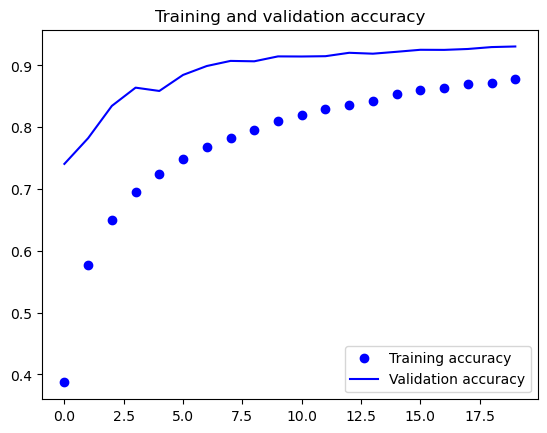

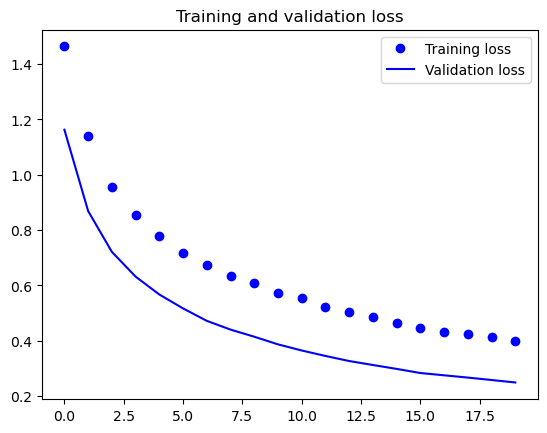

In [22]:
accuracy = risk_train.history['accuracy']
val_accuracy = risk_train.history['val_accuracy']
loss = risk_train.history['loss']
val_loss = risk_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##### 13. Comprobar el rendimiento con el set de prueba

In [23]:
predicted_classes2 = risk_model.predict(test_X)

241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [24]:
predicted_classes=[]
for predicted_risk in predicted_classes2:
    predicted_classes.append(predicted_risk.tolist().index(max(predicted_risk)))
predicted_classes=np.array(predicted_classes)

In [25]:
predicted_classes.shape, test_Y.shape

((7708,), (7708,))

##### 14. Comparacion para obtener retroalimentacion   

Found 7108 correct labels


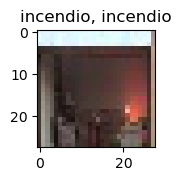

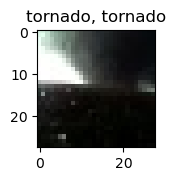

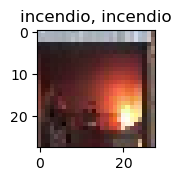

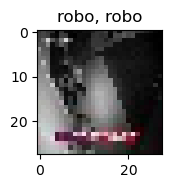

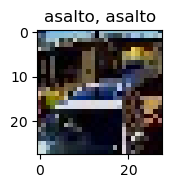

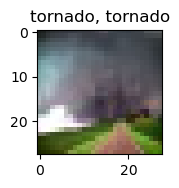

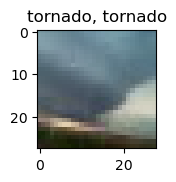

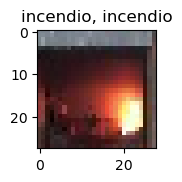

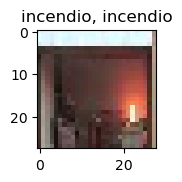

In [26]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none') #CAMBIAR
    plt.title("{}, {}".format(risk[predicted_classes[correct]],
                                                    risk[test_Y[correct]]))
    

    plt.tight_layout()
    plt.show()

Found 600 incorrect labels


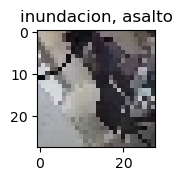

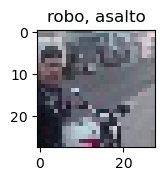

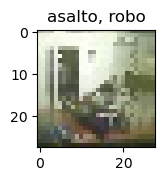

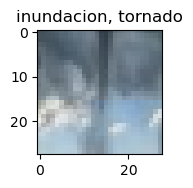

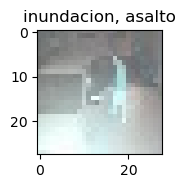

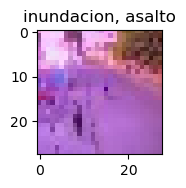

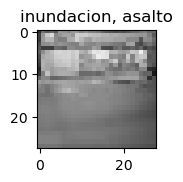

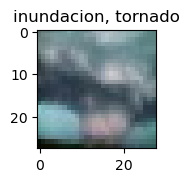

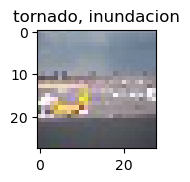

In [27]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')  #CAMBIAR
    plt.title("{}, {}".format(risk[predicted_classes[incorrect]],
                                                    risk[test_Y[incorrect]]))
    plt.tight_layout()
    plt.show()

In [28]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.89      0.84      0.87      1294
     Class 1       1.00      0.99      0.99      1917
     Class 2       0.76      0.87      0.81      1073
     Class 3       0.95      0.95      0.95      1751
     Class 4       0.95      0.91      0.93      1673

    accuracy                           0.92      7708
   macro avg       0.91      0.91      0.91      7708
weighted avg       0.93      0.92      0.92      7708



#####  15. Probar modelo. 

In [29]:
from skimage.transform import resize

filenames = [r'E:\IA\Proyecto_4 CNN\prueba\incendio1.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\incendio2.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\incendio3.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\incendio4.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\incendio5.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\inundacion1.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\inundacion2.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\inundacion3.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\inundacion4.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\inundacion5.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\tornado1.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\tornado2.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\tornado3.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\tornado4.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\tornado5.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\robo1.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\robo2.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\robo3.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\robo4.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\robo5.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\asalto1.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\asalto2.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\asalto3.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\asalto4.jpg',
             r'E:\IA\Proyecto_4 CNN\prueba\asalto5.jpg',
            ]

In [30]:
categorias=['incendio',
            'incendio',
            'incendio',
            'incendio',
            'incendio',
            'inundacion',
            'inundacion',
            'inundacion',
            'inundacion',
            'inundacion',
            'tornado',
            'tornado',
            'tornado',
            'tornado',
            'tornado',
            'robo',
            'robo',
            'robo',
            'robo',
            'robo',
            'asalto',
            'asalto',
            'asalto',
            'asalto',
            'asalto',
           ]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


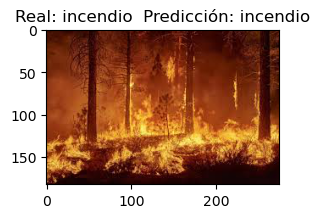

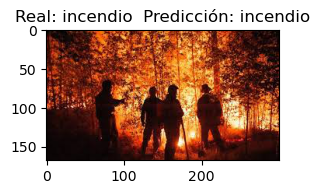

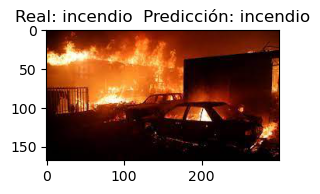

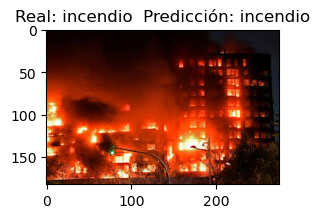

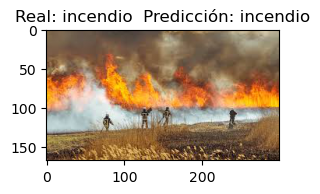

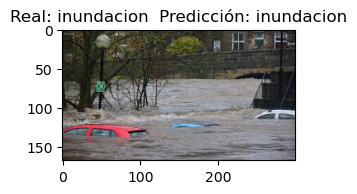

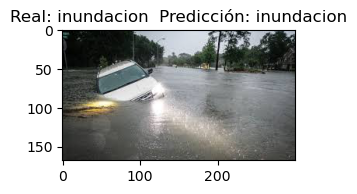

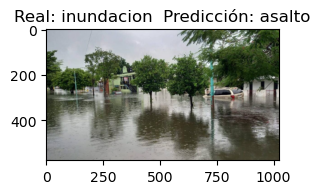

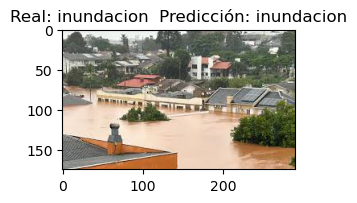

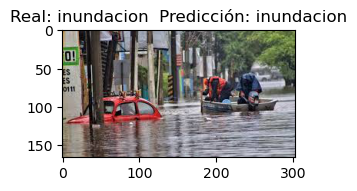

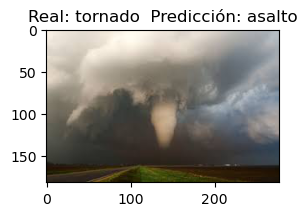

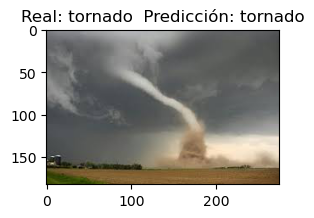

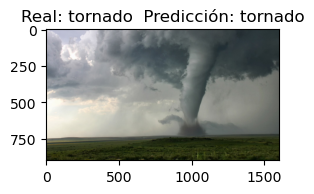

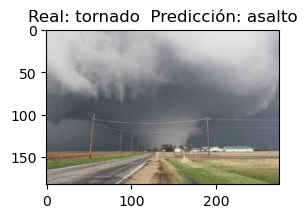

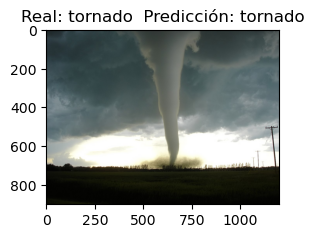

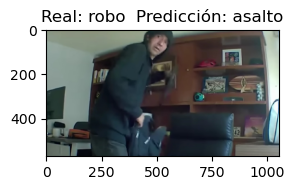

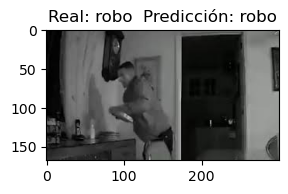

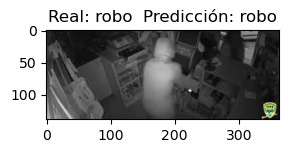

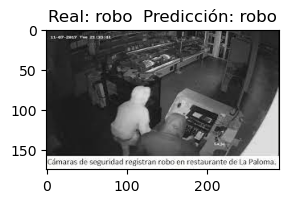

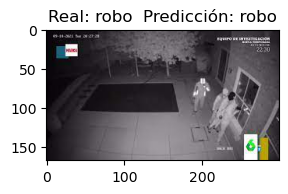

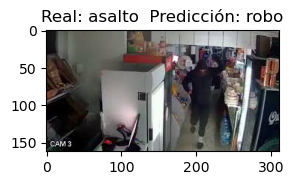

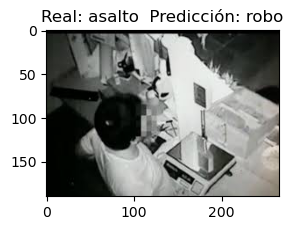

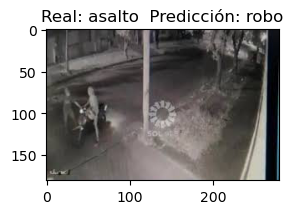

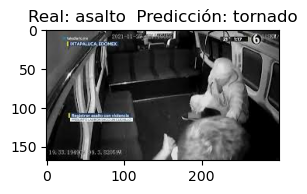

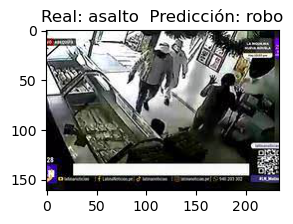

In [31]:
images=[]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) 
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = risk_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    #print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])
    img = plt.imread(filenames[i])
    plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f"Real: {categorias[i]}  Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.show()

In [64]:
from tensorflow.keras.models import load_model
risk_model = load_model('E:\\IA\\Proyecto_4 CNN\\modelo\\risk_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
E:\IA\Proyecto_4 CNN\prueba\inundacion6.jpg inundaciones


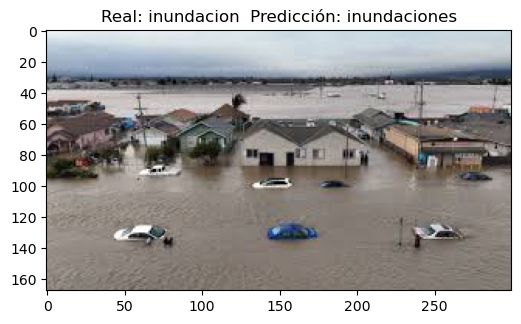

E:\IA\Proyecto_4 CNN\prueba\incendio6.jpg incendio


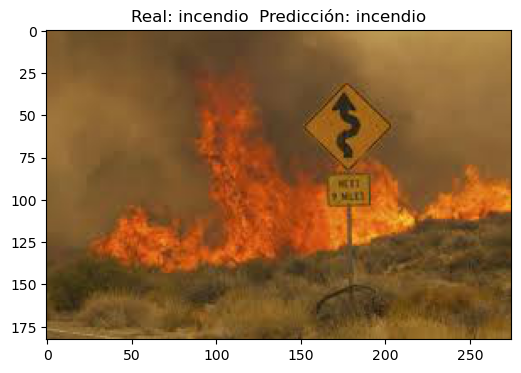

E:\IA\Proyecto_4 CNN\prueba\robo6.jpg inundaciones


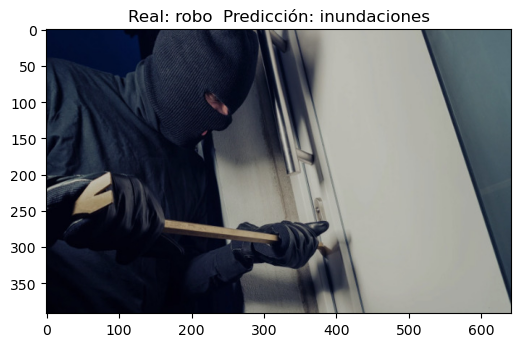

In [57]:
risk=['tornados','Asaltos','inundaciones','incendio','robo']
categoria = ['inundacion','incendio','robo']
filenames = [r'E:\IA\Proyecto_4 CNN\prueba\inundacion6.jpg',r'E:\IA\Proyecto_4 CNN\prueba\incendio6.jpg',r'E:\IA\Proyecto_4 CNN\prueba\robo6.jpg']
images=[]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) 
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = risk_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])
    img = plt.imread(filenames[i])
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Real: {categoria[i]}  Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.show()
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
E:\IA\Proyecto_4 CNN\prueba3\robo1.jpg robo


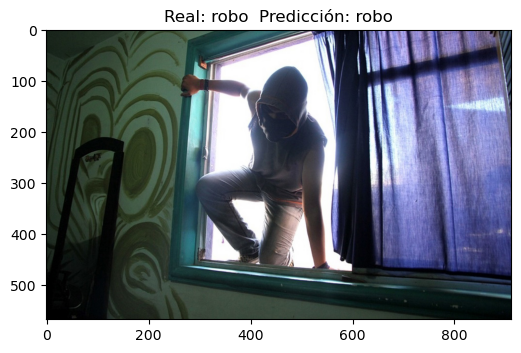

In [67]:
#revision profe
risk=['tornados','Asaltos','inundaciones','incendio','robo']
categoria = ['robo']
filenames = [r'E:\IA\Proyecto_4 CNN\prueba3\robo1.jpg']
images=[]

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (28, 28),anti_aliasing=True,clip=False,preserve_range=True) #CAMBIAR
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) 
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = risk_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], risk[img_tagged.tolist().index(max(img_tagged))])
    img = plt.imread(filenames[i])
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Real: {categoria[i]}  Predicción: {risk[img_tagged.tolist().index(max(img_tagged))]}")
    plt.show()
    